<a href="https://colab.research.google.com/github/Ousoka/ANN_MNIST/blob/master/mnist_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import image dataset (test/train)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
# display the sizes
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


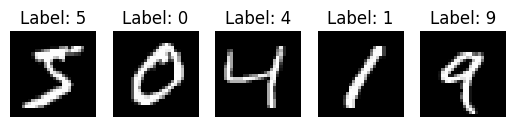

In [ ]:
# display 5 images with their labels
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

In [ ]:
# display the list of labels
print("Labels:", np.unique(train_labels))

Labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# display the amount of images per class in a dataframe
df_imgs = pd.DataFrame({'label': train_labels})
df_imgs['label'].value_counts()


,count
label,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


In [ ]:
# display total amount of images in print
print("Total amount of images:", df_imgs['label'].value_counts().sum())

Total amount of images: 60000


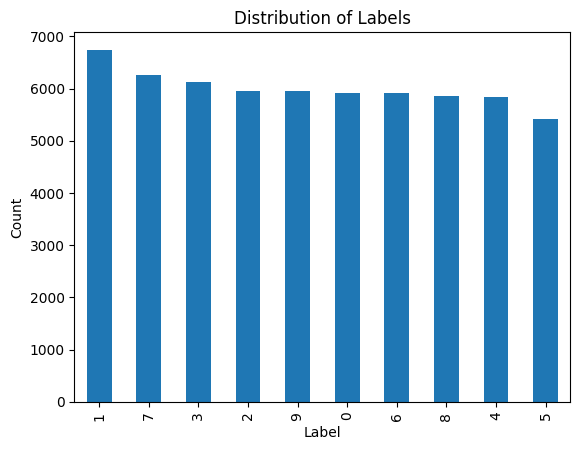

In [ ]:
# is the dataset balanced? display the distribution based on labels
df_imgs['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# display the types of the train labels
df_imgs['label'].dtypes

dtype('uint8')

In [ ]:
# do a one-hot encoding with two_categorical the train labels
train_labels = to_categorical(train_labels)


In [ ]:
# display the train_labels[0]
print("Train labels[0]:", train_labels[0])

Train labels[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# with np.argmax get the biggest index corresponding to the actual images : here the class 5
print("Actual class:", np.argmax(train_labels[0]))

Actual class: 5


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8209 - loss: 4.5652 - val_accuracy: 0.9125 - val_loss: 0.4639
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9174 - loss: 0.4048 - val_accuracy: 0.9068 - val_loss: 0.4374
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9264 - loss: 0.3179 - val_accuracy: 0.9383 - val_loss: 0.2823
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9437 - loss: 0.2316 - val_accuracy: 0.9453 - val_loss: 0.2355
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9517 - loss: 0.1800 - val_accuracy: 0.9564 - val_loss: 0.1868
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9601 - loss: 0.1438 - val_accuracy: 0.9552 - val_loss: 0.1785
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9661 - loss: 0.1257 - val_accuracy: 0.9613 - val_loss: 0.1678
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9704 - loss: 0.111

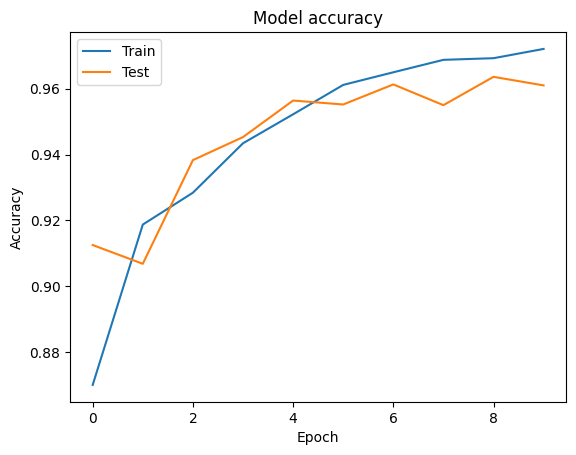

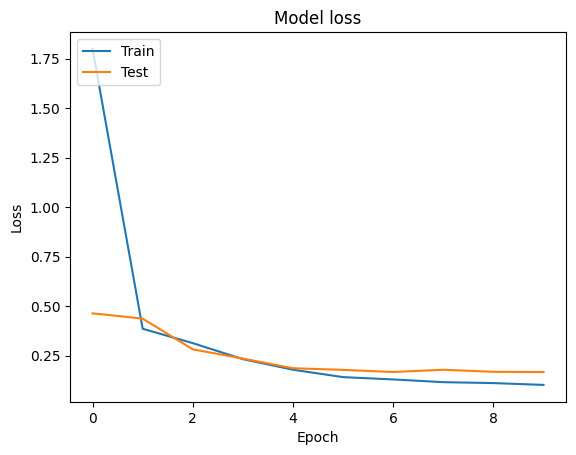

In [ ]:
# use neural network with 2 * 128 in 10 epoches to train the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model and display its results, curves, ...
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, to_categorical(test_labels)))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# get the accuracy of the model
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels))
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.1818
Test accuracy: 0.9610000252723694


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


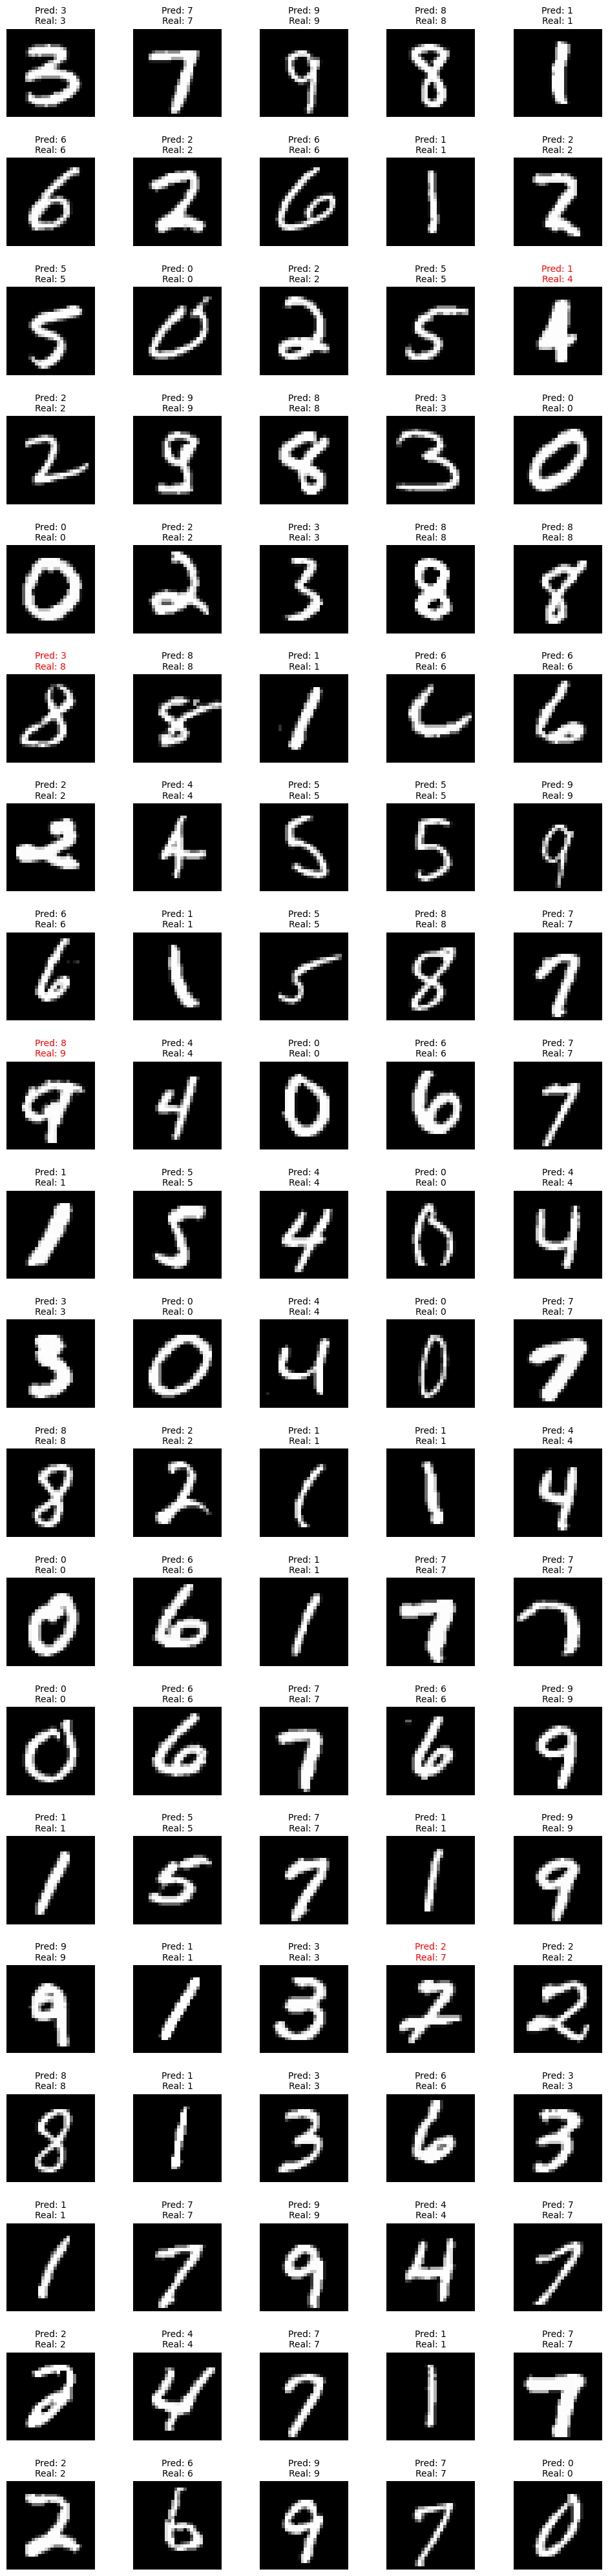


Out of 100 random images, 96 were correctly predicted and 4 were incorrectly predicted.


In [ ]:
# from 100 random images from test and display Pred: label and Real: label with the image and for the wrong ones display the texts in red and tell a summary out of the 100 the good predictions and the bad ones


import numpy as np
import matplotlib.pyplot as plt

# Sample 100 random images
random_indices = np.random.randint(0, len(test_images), 100)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]

# Predict labels
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Count correct and incorrect predictions
correct_predictions = np.sum(predicted_labels == random_labels)
incorrect_predictions = 100 - correct_predictions

# Plotting (20 rows × 5 columns)
plt.figure(figsize=(10, 40))  # Width x Height in inches
for i in range(100):
    plt.subplot(20, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(
        f"Pred: {predicted_labels[i]}\nReal: {random_labels[i]}",
        color='red' if predicted_labels[i] != random_labels[i] else 'black',
        fontsize=10
    )
    plt.axis('off')

plt.tight_layout(h_pad=2.0)  # Increased space between rows
plt.show()

# Display summary
print(f"\nOut of 100 random images, {correct_predictions} were correctly predicted and {incorrect_predictions} were incorrectly predicted.")



In [ ]:
# add Gaussian noise with variance control (noise_factor), and apply it to 80% of the train_images and test_images
import numpy as np

def add_gaussian_noise(images, noise_factor):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=images.shape)
    noisy_images = images + noise
    # Clip values to stay between 0 and 1 (assuming images are normalized)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

noise_factor = 0.8
noisy_train_images = add_gaussian_noise(train_images, noise_factor)
noisy_test_images = add_gaussian_noise(test_images, noise_factor)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7743 - loss: 0.6980 - val_accuracy: 0.9078 - val_loss: 0.2938
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9169 - loss: 0.2635 - val_accuracy: 0.9210 - val_loss: 0.2453
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9448 - loss: 0.1729 - val_accuracy: 0.9279 - val_loss: 0.2258
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9590 - loss: 0.1257 - val_accuracy: 0.9298 - val_loss: 0.2233
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9683 - loss: 0.0974 - val_accuracy: 0.9385 - val_loss: 0.2067
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9762 - loss: 0.0734 - val_accuracy: 0.9334 - val_loss: 0.2325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9790 - loss: 0.0618 - val_accuracy: 0.9408 - val_loss: 0.2319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9845 - loss: 0.

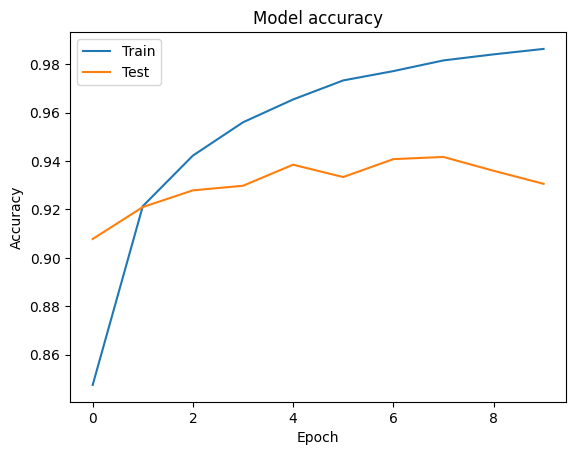

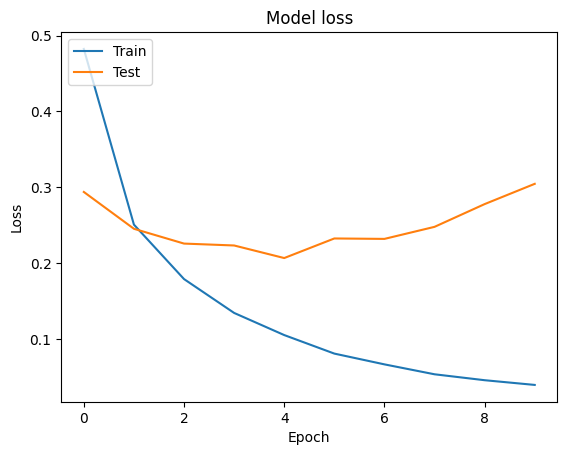

In [ ]:
# use neural network with 2 * 128 in 10 epoches to train the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model and display its results, curves, ...
history = model.fit(noisy_train_images, train_labels, epochs=10, validation_data=(noisy_test_images, to_categorical(test_labels)))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# get the accuracy of the model
test_loss, test_acc = model.evaluate(noisy_test_images, to_categorical(test_labels))
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9223 - loss: 0.3467
Test accuracy: 0.9305999875068665


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


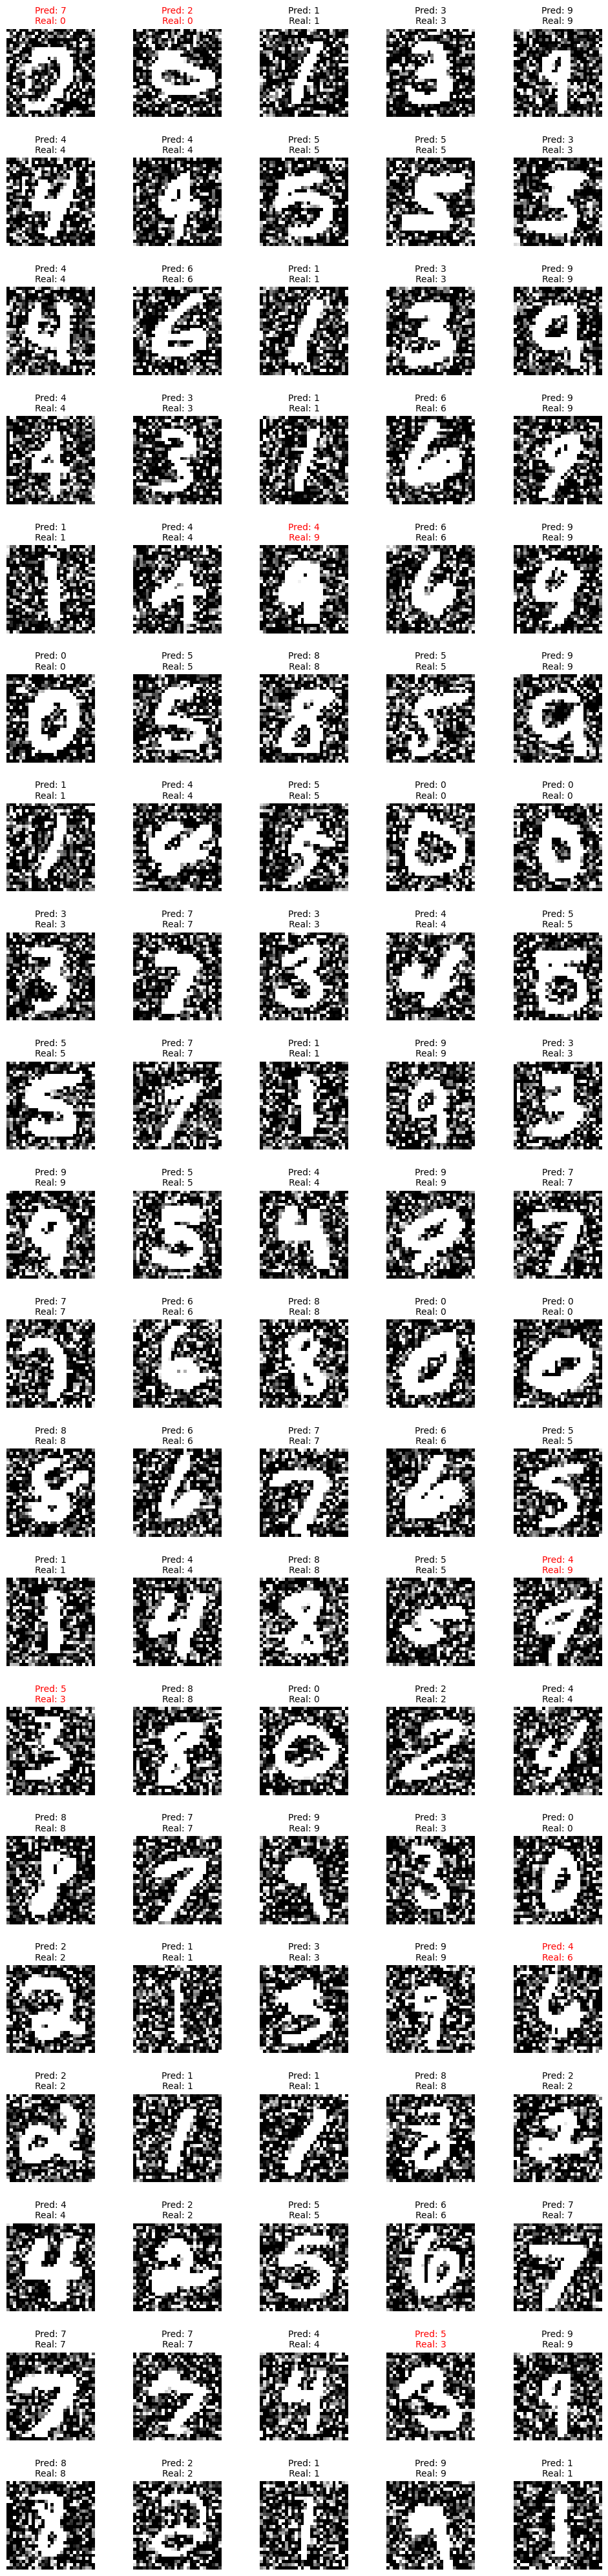


Out of 100 random images, 93 were correctly predicted and 7 were incorrectly predicted.


In [ ]:
# from 100 random images from test and display Pred: label and Real: label with the image and for the wrong ones display the texts in red and tell a summary out of the 100 the good predictions and the bad ones


import numpy as np
import matplotlib.pyplot as plt

# Sample 100 random images
random_indices = np.random.randint(0, len(noisy_test_images), 100)
random_images = noisy_test_images[random_indices]
random_labels = test_labels[random_indices]

# Predict labels
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Count correct and incorrect predictions
correct_predictions = np.sum(predicted_labels == random_labels)
incorrect_predictions = 100 - correct_predictions

# Plotting (20 rows × 5 columns)
plt.figure(figsize=(10, 40))  # Width x Height in inches
for i in range(100):
    plt.subplot(20, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(
        f"Pred: {predicted_labels[i]}\nReal: {random_labels[i]}",
        color='red' if predicted_labels[i] != random_labels[i] else 'black',
        fontsize=10
    )
    plt.axis('off')

plt.tight_layout(h_pad=2.0)  # Increased space between rows
plt.show()

# Display summary
print(f"\nOut of 100 random images, {correct_predictions} were correctly predicted and {incorrect_predictions} were incorrectly predicted.")



In [ ]:
# out of all the images in the test what are the error percentage
incorrect_predictions = np.sum(predicted_labels != random_labels)
error_percentage = (incorrect_predictions / len(random_labels)) * 100
print(f"Error percentage: {error_percentage}%")


Error percentage: 7.000000000000001%


# CNN

## With PIL

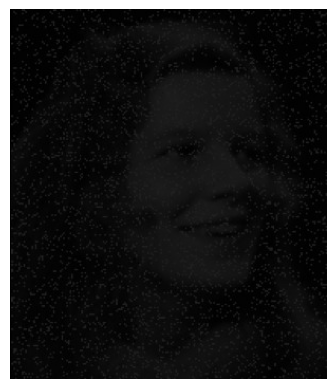

In [2]:
#Import an image
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Image URL
url = 'https://github.com/Ousoka/ANN_MNIST/blob/b681c89c7e8c617b80517ae8ec5b1a8578babd60/WhatsApp%20Image%202025-04-22%20%C3%A0%2010.14.47_9efeafdf.jpg?raw=true'

# Fetch the image content
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: remove axes
plt.show()



Text(0, 0.5, 'Nombre de pixels')

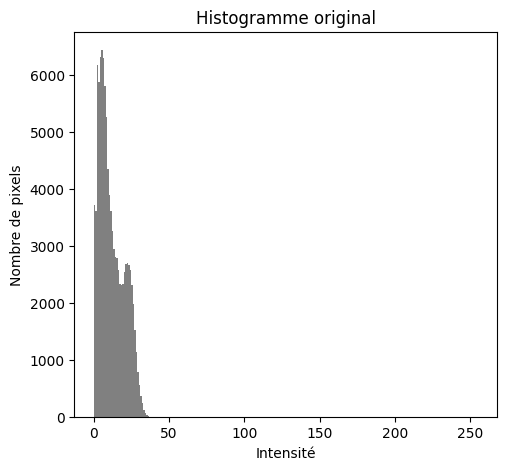

In [3]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import numpy as np

# 1. Charger l'image depuis l'URL
url = 'https://github.com/Ousoka/ANN_MNIST/blob/b681c89c7e8c617b80517ae8ec5b1a8578babd60/WhatsApp%20Image%202025-04-22%20%C3%A0%2010.14.47_9efeafdf.jpg?raw=true'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 2. Convertir en niveaux de gris
gray_img = img.convert('L')

# 3. Afficher l’histogramme original
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(np.array(gray_img).flatten(), bins=256, range=(0, 255), color='gray')
plt.title('Histogramme original')
plt.xlabel('Intensité')
plt.ylabel('Nombre de pixels')




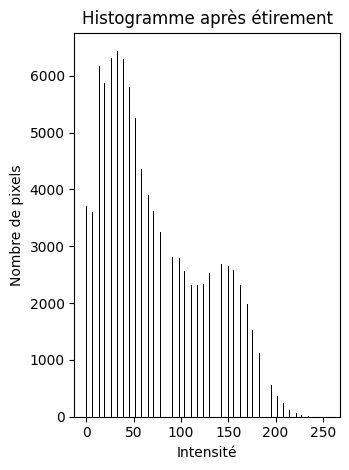

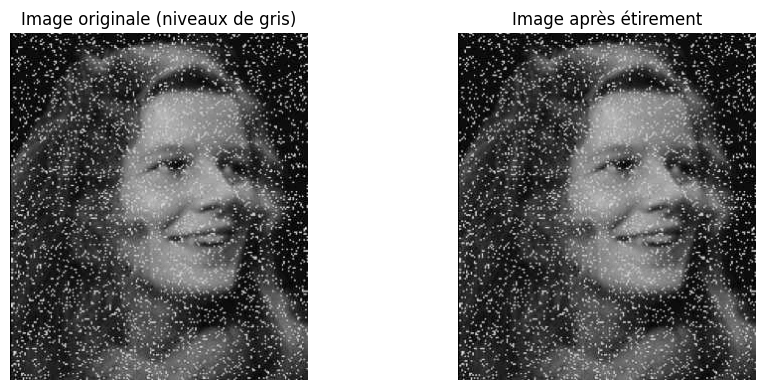

In [4]:
# 4. Étirement de l’histogramme (contraste)
etiree = ImageOps.autocontrast(gray_img)  # PIL fait un étirement automatique

# 5. Afficher l’histogramme après étirement
plt.subplot(1, 2, 2)
plt.hist(np.array(etiree).flatten(), bins=256, range=(0, 255), color='black')
plt.title("Histogramme après étirement")
plt.xlabel('Intensité')
plt.ylabel('Nombre de pixels')

plt.tight_layout()
plt.show()

# 6. Affichage des images avant/après
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Image originale (niveaux de gris)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(etiree, cmap='gray')
plt.title("Image après étirement")
plt.axis('off')

plt.tight_layout()
plt.show()

## With CV2

Text(0, 0.5, 'Nombre de pixels')

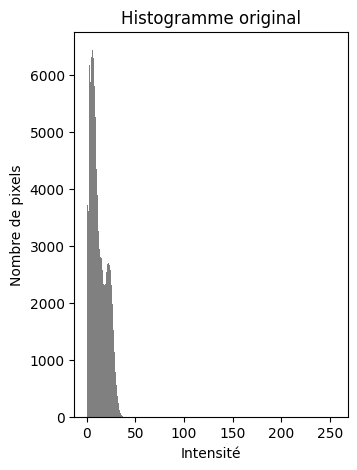

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# 1. Charger l'image depuis l'URL
url = 'https://github.com/Ousoka/ANN_MNIST/blob/b681c89c7e8c617b80517ae8ec5b1a8578babd60/WhatsApp%20Image%202025-04-22%20%C3%A0%2010.14.47_9efeafdf.jpg?raw=true'
resp = requests.get(url)
img_array = np.asarray(bytearray(resp.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# 2. Convertir en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Afficher histogramme original
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(gray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogramme original")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")



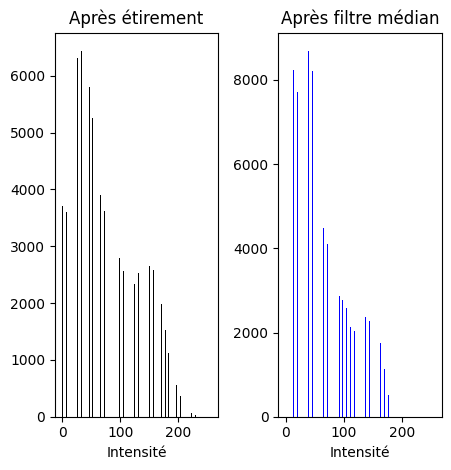

In [10]:
# 4. Étirement de l'histogramme (contraste)
etiree = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# 5. Histogramme après étirement
plt.subplot(1, 3, 2)
plt.hist(etiree.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Après étirement")
plt.xlabel("Intensité")

# 6. Appliquer un filtre médian
filtrée = cv2.medianBlur(etiree, 5)  # Taille du noyau 5x5

# 7. Histogramme après filtrage
plt.subplot(1, 3, 3)
plt.hist(filtrée.ravel(), bins=256, range=(0, 256), color='blue')
plt.title("Après filtre médian")
plt.xlabel("Intensité")

plt.tight_layout()
plt.show()


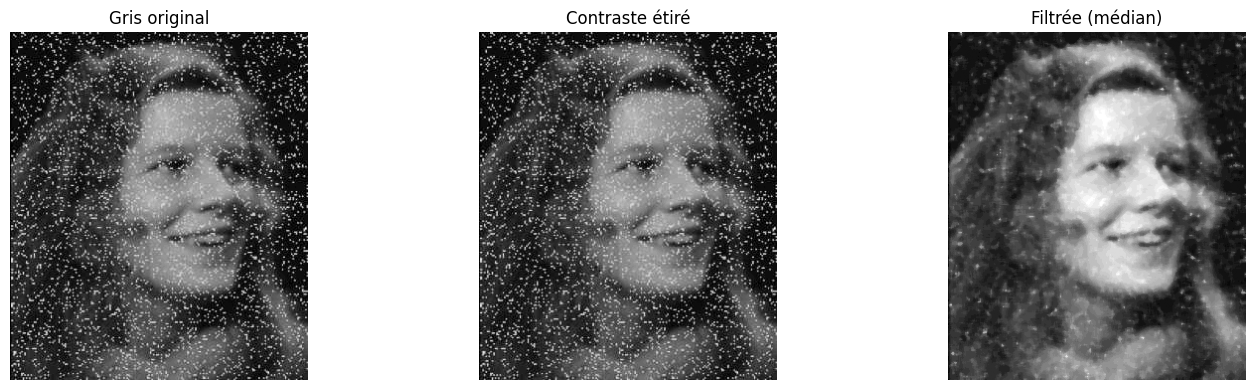

In [9]:
# 8. Affichage des images
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Gris original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(etiree, cmap='gray')
plt.title("Contraste étiré")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtrée, cmap='gray')
plt.title("Filtrée (médian)")
plt.axis('off')

plt.tight_layout()
plt.show()


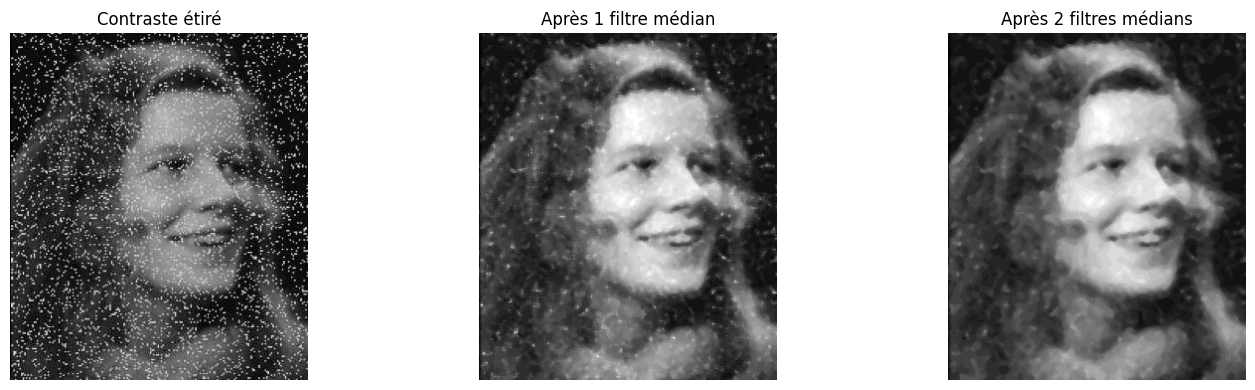

In [11]:
# 9. Deuxième filtre médian
filtrée2 = cv2.medianBlur(filtrée, 5)  # Encore un noyau 5x5

# 10. Affichage final avec deuxième filtre médian
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(etiree, cmap='gray')
plt.title("Contraste étiré")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtrée, cmap='gray')
plt.title("Après 1 filtre médian")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtrée2, cmap='gray')
plt.title("Après 2 filtres médians")
plt.axis('off')

plt.tight_layout()
plt.show()


## CNN sur MNIST

In [ ]:
# Separerer rn train (50k) val (10k) test (10k)
# Decouper les images de telle sorte qu'on respect les proportions (statify)
# CNN avec un accuracy >= 99% et une Erreur<=0.8%
# Calculer la precision, le recall